# Obesity Risk Prediction: A Machine Learning Approach

![Alt Text](images/obesity.jpg)

# Business Understanding
Obesity and overweight can be defined as abnormal or excessive fat build-up that poses a risk to health. Obesity often results from taking in more calories than are burned by exercise and normal daily activities. Obesity occurs when a person's body mass index is 30 or greater. Body mass index (BMI) is a measure of body fat based on height and weight. The rising rate of obesity in the medical field poses significant challenges to both patients and healthcare providers. Addressing obesity at an early stage is important for preventive healthcare and overall well-being. Our business centers around leveraging advanced machine learning techniques to predict the risk of obesity, providing valuable insights for healthcare providers to proactively intervene and offer personalized care.

The key stakeholders are healthcare providers. They include physicians, nurses, dietitians, and other healthcare professionals who are involved in patient care. Patients also benefit from personalized healthcare interventions based on their obesity risk. Healthcare systems are responsible for implementing and integrating the predictive model into existing healthcare frameworks.

## Problem Statement
Overweight and obesity are major risk factors for a number of chronic diseases, including cardiovascular diseases such as heart disease and stroke, which are the leading causes of death worldwide. Rates of overweight and obesity continue to grow in adults and children. Once considered a problem only in high-income countries, overweight and obesity are now dramatically on the rise in low- and middle-income countries, particularly in urban areas. Obesity in childhood is associated with a wide range of serious health complications and an increased risk of premature onset of related illnesses. Without intervention, children and adolescents with obesity will likely continue to be obese into adulthood. 
The goal is to develop a robust and accurate obesity risk prediction model. This model aims to evaluate an individual's likelihood of being classified as at-risk for obesity based on a set of pertinent features. This will enhance the ability to identify individuals at risk of obesity early on, allowing for proactive intervention and personalized health plans.

## Objectives
- To explore the relationship between obesity and key features such as weight, height, age and gender. Determine if these features contribute to the likelihood of obesity.
- To develop a machine learning model capable of predicting obesity risk based on individual characteristics as input variables.
- To optimize the predictive accuracy of the model, ensuring reliable and actionable results for healthcare providers. Ensure the model provides interpretable insights, allowing healthcare professionals to understand and trust the predictions.

# Data Understanding
The data consists of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical conditions. It can be found in the file `ObesityDataSet.csv`.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Load the file into a DataFrame
df = pd.read_csv("ObesityDataSet.csv")

In [3]:
# Check the shape of the DataFrame
df.shape

(2111, 17)

In [4]:
# Inspect the first few rows of the DataFrame
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Checking the structure and contents of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Obtain summary of the descriptive statistics for the numerical columns 
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


The DataFrame contains 17 rows and 2111 columns. 

The columns are `Gender`, `Age`, `Height`, `Weight`, `family_history_with_overweight`, `FAVC`, `FCVC`, `NCP`, `CAEC`, `SMOKE`, `CH2O`, `SCC`, `FAF`, `TUE`, `CALC`, `MTRANS`, `NObeyesdad`. The description of the column names can be found in the file `Data description.txt`.

We have float and object data types.

There are no columns containing missing data.

# Data Preparation

## Data Cleaning
In order to prepare our data for modeling, we:
- Identify outliers and either drop or keep them.
- Check for missing values and handle them.

In [7]:
# Check for missing values
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There are no missing values in our dataset.

In [8]:
# Check for outliers in the data
def check_outliers(data, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    
        # Define lower and upper thresholds
        lower_threshold = data[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = data[column].quantile(0.75) + 1.5 * iqr
    
        # Find outliers
        outliers = data[(data[column] < lower_threshold) | (data[column] > upper_threshold)]
    
        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = df.select_dtypes(include = ["number"])
check_outliers(df, columns_to_check)

Age
Number of outliers: 168

Height
Number of outliers: 1

Weight
Number of outliers: 1

FCVC
Number of outliers: 0

NCP
Number of outliers: 579

CH2O
Number of outliers: 0

FAF
Number of outliers: 0

TUE
Number of outliers: 0



In [9]:
# Check value counts for Age column
df["Age"].value_counts()

18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
19.314964      1
21.900120      1
23.421726      1
18.312665      1
61.000000      1
Name: Age, Length: 1402, dtype: int64

From the distribution of the age, we can see that the values lie within the range of 18-61 which is within the age range from which the dataset was collected. Therefore, we do not drop the outliers.

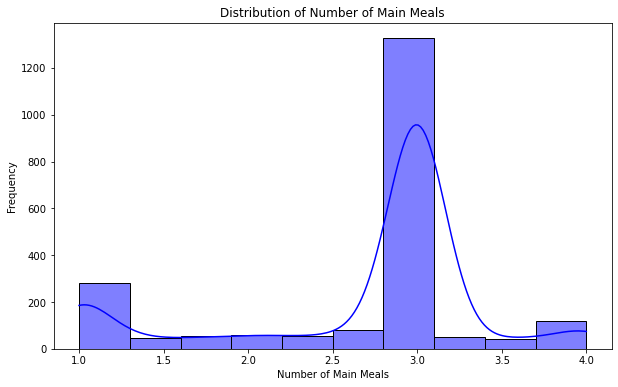

<Figure size 432x288 with 0 Axes>

In [10]:
# check the distribution of the "Number of main meals" (NCP) column
plt.figure(figsize=(10, 6))
sns.histplot(df["NCP"], bins=10, kde=True, color="blue")
plt.title("Distribution of Number of Main Meals")
plt.xlabel("Number of Main Meals")
plt.ylabel("Frequency")
plt.show()

# Save the figure
plt.savefig("images/Distribution of Number of Main Meals.png")

From the plot of NCP column we can see that more that 1200 values lie around the value of 3, which explains our mean(2.7) and median(3.0) values for this column. The limited spread of the data points and the fact that most values cluster around one number suggests that the observed outliers are genuine variations within the dataset. Therefore, we keep them.

In [11]:
#Check the outlier in the Height column
df[df["Height"]==1.98]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
349,Male,20.0,1.98,125.0,yes,yes,2.0,3.0,Always,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_I


Looking at the height outlier, we can see that the individual has a weight of 125m which seems like a valid data point. Taller individuals might have different body compositions, weight distributions, and potential health risks compared to shorter individuals. Therefore, including this height as a feature in our analysis can contribute to a more comprehensive understanding of factors influencing obesity risk.

In [12]:
#Check the outlier in the Weight column
df[df["Weight"]==173]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
344,Male,18.0,1.87,173.0,yes,yes,3.0,3.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III


The weight of 173 kg combined with a height of 1.87 meters looks like an extreme value, and such values can significantly impact our analysis of obesity. We therefore drop it.

In [13]:
# Drop the Weight outlier
df = df[df["Weight"] != 173]

In [14]:
# Rename the NObeyesdad column for readability
df.rename(columns={"NObeyesdad": "NObesity"}, inplace=True)

###  Exploratory Data Analysis
We perform analysis to extract insights, identify patterns and draw conclusions from the data.

We compare the relationship between the numeric variables using a correlation matrix. A positive correlation indicates that as one variable increases, the other tends to increase, while a negative correlation indicates that as one variable increases, the other tends to decrease.

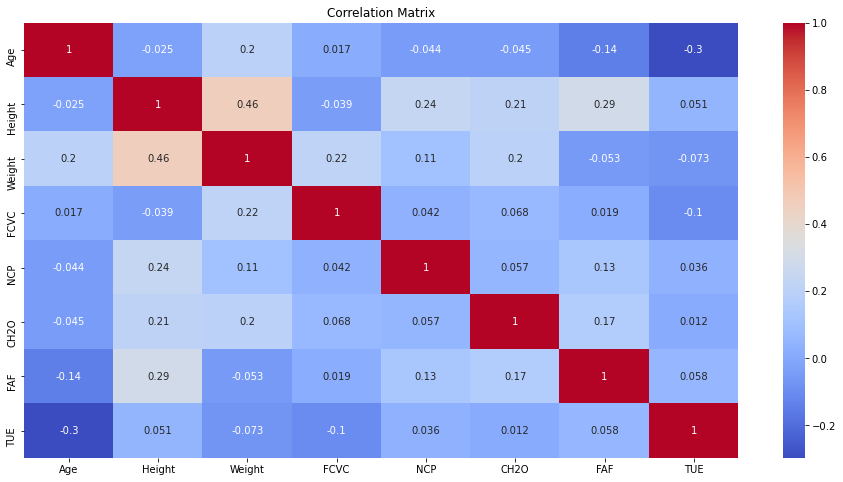

<Figure size 432x288 with 0 Axes>

In [15]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Save the figure
plt.savefig("images/Correlation Matrix.png")

From the matrix, we can see that the features with the highest correlation are `Height` and `Weight`, with a correlation of 0.46.
The features with the lowest correlation are `Age` and `Height` at -0.025.

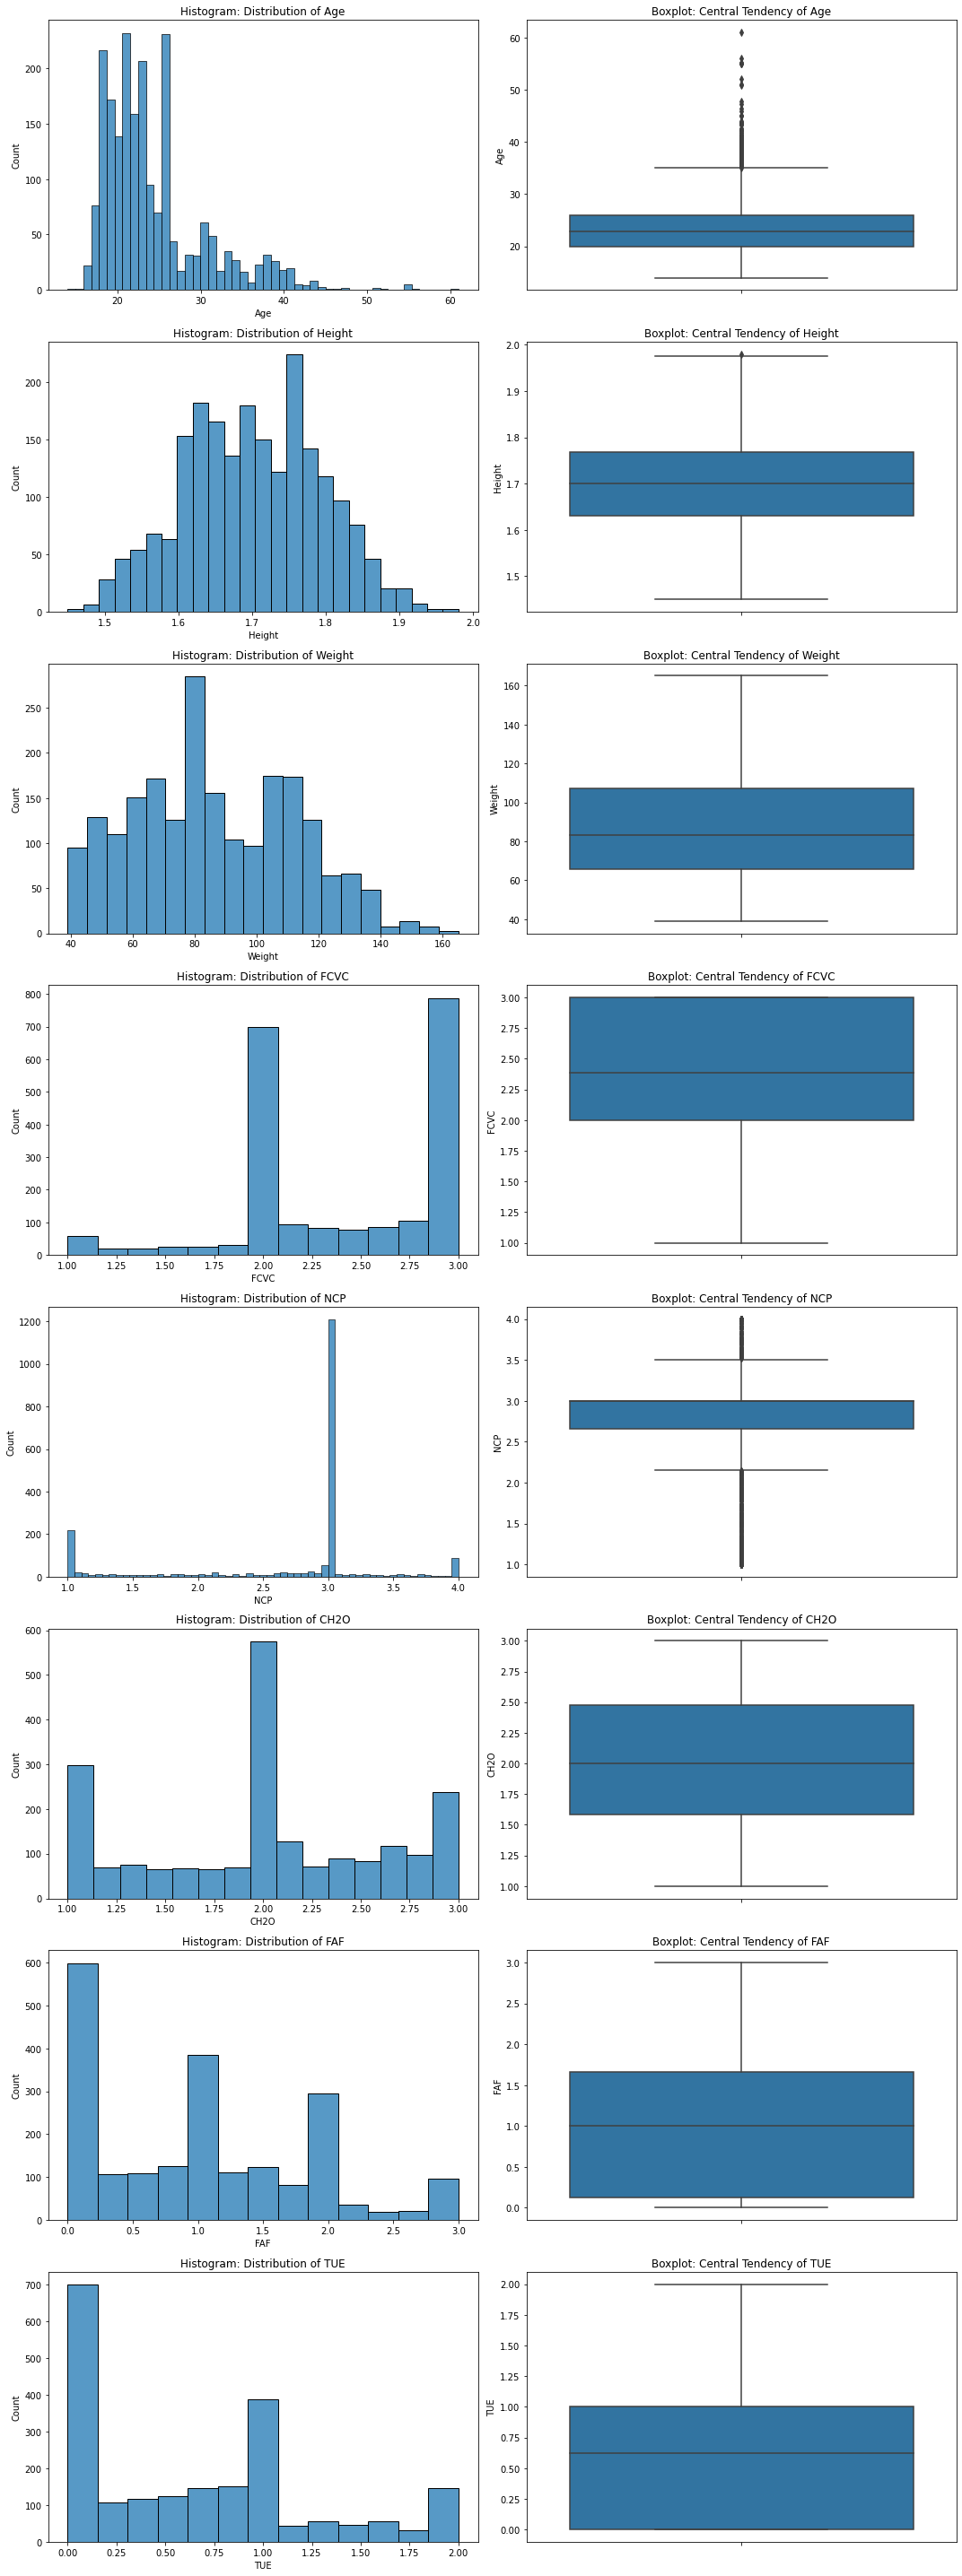

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a function to visualize our numerical columns
def visualize_numerical_columns(data, columns):
    num_columns = len(columns)
    
    # Create subplots
    fig, axes = plt.subplots(num_columns, 2, figsize=(15, 5 * num_columns))

    # Ensure columns is a list, even if a single column is provided
    if not isinstance(columns, list):
        columns = [columns]

    for i, column in enumerate(columns):
        # Plot histogram
        sns.histplot(data=data, x=column, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogram: Distribution of {column}")

        # Plot boxplot
        sns.boxplot(data=data, y=column, ax=axes[i, 1])
        axes[i, 1].set_title(f"Boxplot: Central Tendency of {column}")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Visualize the numerical columns
columns_to_visualize = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
visualize_numerical_columns(df, columns_to_visualize)

# Save the figure
plt.savefig("images/Numerical Columns Visualization.png")

We can see that age is positively skewed.

The height appears to be normally distributed.

We visualize the distribution of our categorical columns.

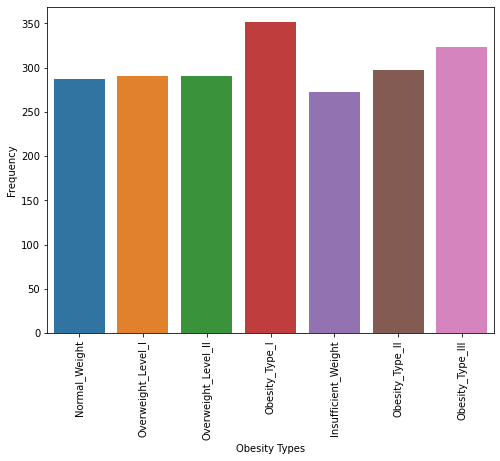

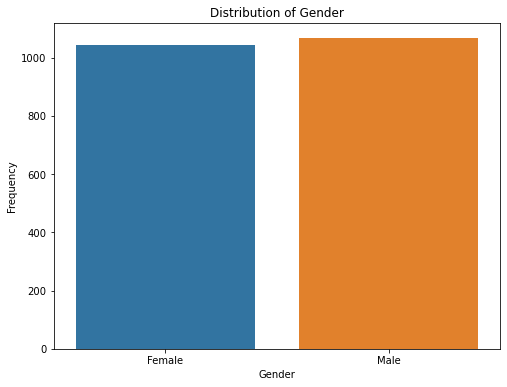

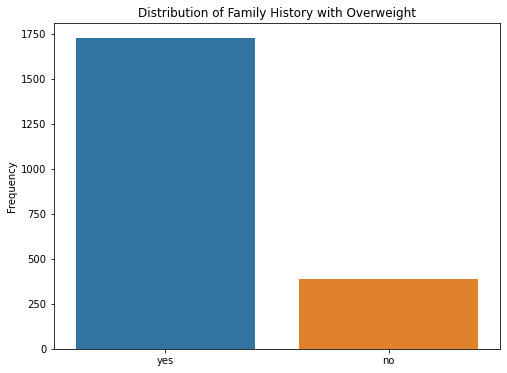

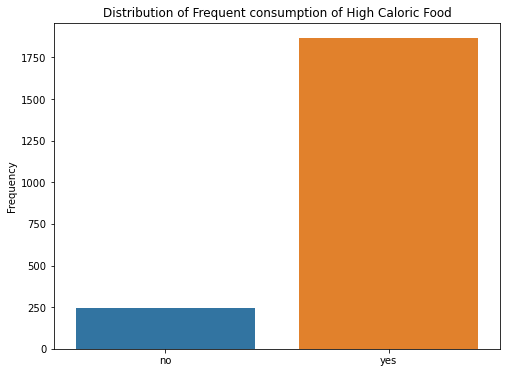

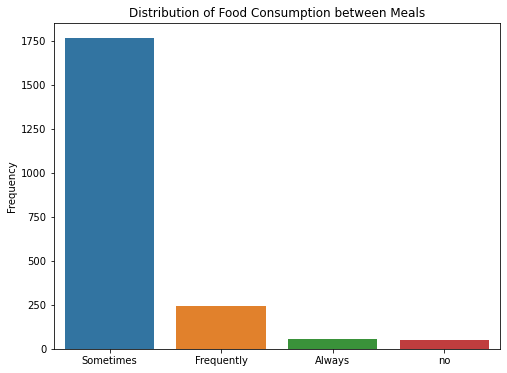

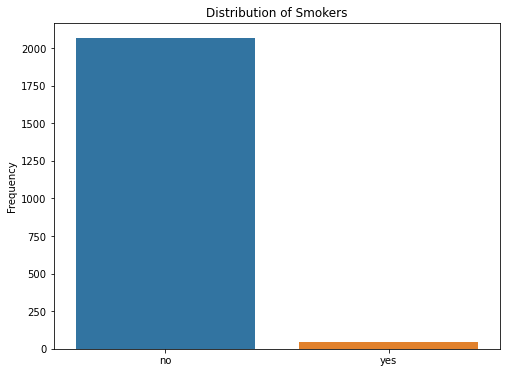

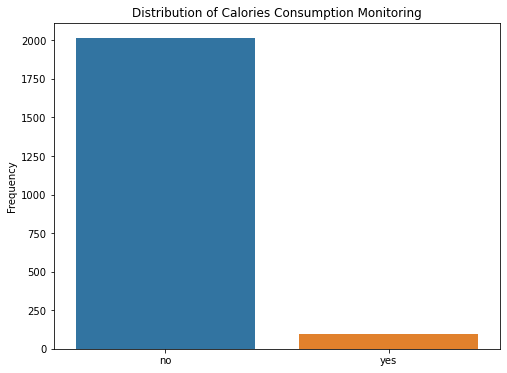

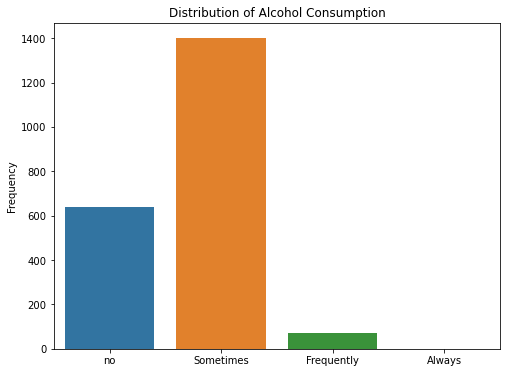

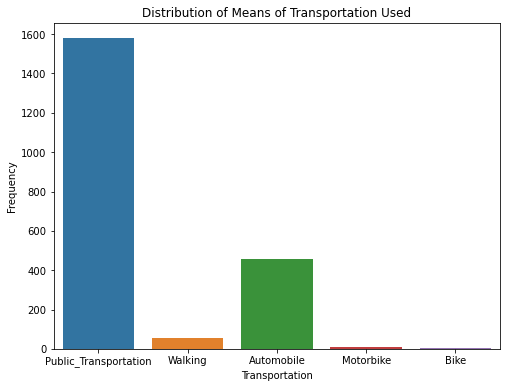

<Figure size 432x288 with 0 Axes>

In [17]:
def visualize_categorical_column(data, x, xlabel="", ylabel="Frequency", title="", rotation=None, grid=False):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=x, data=data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if rotation is not None:
        plt.xticks(rotation=rotation)
    plt.show()

# Visualize the categorical columns
visualize_categorical_column(df, x="NObesity", xlabel="Obesity Types", rotation="vertical")
visualize_categorical_column(df, x="Gender", xlabel="Gender", title="Distribution of Gender")
visualize_categorical_column(df, x="family_history_with_overweight", title="Distribution of Family History with Overweight")
visualize_categorical_column(df, x="FAVC", title="Distribution of Frequent consumption of High Caloric Food")
visualize_categorical_column(df, x="CAEC", title="Distribution of Food Consumption between Meals")
visualize_categorical_column(df, x="SMOKE", title="Distribution of Smokers")
visualize_categorical_column(df, x="SCC", title="Distribution of Calories Consumption Monitoring")
visualize_categorical_column(df, x="CALC", title="Distribution of Alcohol Consumption")
visualize_categorical_column(df, x="MTRANS", xlabel="Transportation", title="Distribution of Means of Transportation Used")

# Save the figure
plt.savefig("images/Visualization of categorical columns.png")

We can see that Obesity_Type_I has the highest number at 351 while Insufficient_Weight has the least at 272.

# Modeling
## Requirements
**1. Data Preprocessing** 
Prepare the data for modeling by addressing the data types for the categorical columns.

**2. Perform a Train-Test Split.**
For a complete end-to-end ML process, we need to create a holdout set that we will use at the very end to evaluate our final model's performance.

**3. Build and Evaluate a Simple Baseline Model.**
Without performing any preprocessing or hyperparameter tuning, build and evaluate a vanilla logistic regression model.

**4. Build and Evaluate Additional Models.**
Create versions of the simple model with tuned hyperparameters. Build a more complex model, Random Forest and compare the selected metric with that of the simple models.

**5. Choose and Evaluate a Final Model.**
Preprocess the full training set and test set appropriately, then evaluate the final model with various classification metrics.

### 1. Data Preprocessing
- Convert the categorical columns to the correct data types.

In [18]:
# Let's see all categorical columns in our data
categoricals=[]
for col in df.columns:
    if df[col].dtype == object:
        categoricals.append(col)

categoricals

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObesity']

We can see that the columns `Gender`, `family_history_with_overweight`, `FAVC`, `CAEC`, `SMOKE`, `SCC`, `CALC`, `MTRANS` and `NObeyesity` are categorical variables. We need to convert them to numerical values.

In [19]:
# Define a function for getting value counts for specified columns in the DataFrame
def get_value_counts(dataframe, columns=None):
    """
    Get value counts for specified columns in a DataFrame.
    Parameters:
    - dataframe: Input DataFrame.
    - columns: List of column names to get value counts for. 
    Returns a dictionary containing value counts for specified columns.
    """
    value_counts_dict = {}
    
    for col in columns:
        if col in dataframe.columns:
            value_counts_dict[col] = dataframe[col].value_counts()
    return value_counts_dict

In [20]:
# Get the value counts for the categorical coumns
results = get_value_counts(df, categoricals)

for col, value_counts in results.items():
    print(f"Value Counts for {col}:")
    print(value_counts)
    print()

Value Counts for Gender:
Male      1067
Female    1043
Name: Gender, dtype: int64

Value Counts for family_history_with_overweight:
yes    1725
no      385
Name: family_history_with_overweight, dtype: int64

Value Counts for FAVC:
yes    1865
no      245
Name: FAVC, dtype: int64

Value Counts for CAEC:
Sometimes     1765
Frequently     241
Always          53
no              51
Name: CAEC, dtype: int64

Value Counts for SMOKE:
no     2066
yes      44
Name: SMOKE, dtype: int64

Value Counts for SCC:
no     2014
yes      96
Name: SCC, dtype: int64

Value Counts for CALC:
Sometimes     1400
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

Value Counts for MTRANS:
Public_Transportation    1579
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

Value Counts for NObesity:
Obesity_Type_I         351
Obesity_Type_III       323
Obesity_Type_II        297
Overweight_L

Since `Gender`, `family_history_with_overweight`, `FAVC`, `SMOKE` and `SCC` only have two categories, we can transform them using label encoding.

In [21]:
# Convert columns to the correct data types
encoder = LabelEncoder()

columns_to_encode = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

# Check that the change has been made    
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Since `CAEC`, `CALC`, `MTRANS` and `NObesity` have more than two categories, we can use ordinal encoding to transform them. Ordinal encoding preserves the order of the categories while recognizing that the numerical differences between them may not accurately reflect the underlying relationships.

In [22]:
# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

columns_to_encode = ["CAEC", "CALC", "MTRANS", "NObesity"]

for column in columns_to_encode:
    df[column] = ordinal_encoder.fit_transform(df[[column]])
    
# Display the updated DataFrame
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2.0,0,2.0,0,0.0,1.0,3.0,3.0,1.0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2.0,1,3.0,1,3.0,0.0,2.0,3.0,1.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2.0,0,2.0,0,2.0,1.0,1.0,3.0,1.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2.0,0,2.0,0,2.0,0.0,1.0,4.0,5.0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2.0,0,2.0,0,0.0,0.0,2.0,3.0,6.0


In [23]:
# Check that the columns now have numeric data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2110 non-null   int32  
 1   Age                             2110 non-null   float64
 2   Height                          2110 non-null   float64
 3   Weight                          2110 non-null   float64
 4   family_history_with_overweight  2110 non-null   int32  
 5   FAVC                            2110 non-null   int32  
 6   FCVC                            2110 non-null   float64
 7   NCP                             2110 non-null   float64
 8   CAEC                            2110 non-null   float64
 9   SMOKE                           2110 non-null   int32  
 10  CH2O                            2110 non-null   float64
 11  SCC                             2110 non-null   int32  
 12  FAF                             21

Now that we have correct data types for our columns, our data is ready for building our models.

### 2. Perform a Train Test Split
In total, there are 16 predictors, and one outcome variable.The target is `NObesity`. We split `df` into `X` and `y`, then perform a train-test split  to determine how well our algorithm will generalize to new data. We set `test_size` to 0.25 and `random_state=42` for reproducibility.

In [24]:
# Split the data
y = df["NObesity"]
X = df.drop(["NObesity"], axis=1)

# Perform a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Create and fit the scaler on the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform both the training and testing data
X_test_scaled = scaler.transform(X_test)

### 3. Build and Evaluate a Simple Baseline Model.
We build a baseline logistic regression model with `max_iter=1000` and `random_state=42`.

In [26]:
# Create and fit a logistic regression model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
baseline_train_preds = baseline_model.predict(X_train_scaled)

Since there doesn't appear to be any noticeable imbalance between our classes based on the value counts we got for our target variable, accuracy would be the best metric to use to assess how well our model worked. 

Recall also that our goal is to predict the probability of an individual being at risk of obesity. The cost of having false positives is high. We want to minimize false positives so that we are confident that when the model predicts a positive outcome (obesity risk), it is likely to be correct. 

The optimal indicator to use in this case would be precision since we want to reduce the number of cases where the model incorrectly predicts someone as being at risk of obesity when they are actually not. 

We will focus on optimizing for precision and monitor and report it to get a comprehensive understanding of our model's performance.

In [27]:
# Calculate precision of the model for the train sets
def evaluate_train_precision(train_true, train_pred):
    """
    Evaluate the precision of a model on the training set.

    Parameters:
    - train_true (array-like): True labels of the training set.
    - train_pred (array-like): Predicted labels on the training set.

    Prints and return the precision score of the model on the test data
    """

    # Train Set Precision
    train_precision = precision_score(train_true, train_pred, average="weighted")
    print(f"Train Precision: {train_precision}")

    return train_precision

# Example usage:
precision_baseline_train = evaluate_train_precision(y_train, baseline_train_preds)

Train Precision: 0.7247019486189035


Overally, our model seems to be performing fairly well.

From our precision values of 0.7247 we can see that among the instances predicted as positive (predicting obesity), our model is correct about 72.47% of the time on the test set. 

### 4. Build and Evaluate Additional Models.

#### Logistic Regression Iteration 1
Our model is performing fairly well but could it perform better? Let us try to address any issues of class imbalance by using Synthetic Minority Over-Sampling Technique(SMOTE). We then fit another logistic regression model using similar parameters to our baseline model.

In [28]:
# Create a SMOTE object
smote = SMOTE(sampling_strategy="auto", random_state=42)

# Fit and transform the training data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train a logistic regression model on the resampled data
logreg_model1 = LogisticRegression(max_iter=1000, random_state=42)
logreg_model1.fit(X_resampled, y_resampled)

# Obtain predictions on the training set
train_preds_smote = logreg_model1.predict(X_resampled)

# Use the evaluate_model_performance function
evaluate_train_precision(y_resampled, train_preds_smote)

Train Precision: 0.7454478426955424


0.7454478426955424

Our precision increased by about 0.02. The precision for the SMOTE model 0.7454 is higher than the precision for the baseline model 0.7247. This suggests an improvement in precision when using SMOTE to address class imbalance.

#### Logistic Regression Iteration 2
We create a `StratifiedKFold` cross-validation strategy to ensure all of our classes in each split are represented with the same proportion. We then fit the CVScores visualizer using the `f1_weighted` scoring metric as opposed to the default metric, `accuracy`, to get a better sense of the relationship of precision in our classifier across all of our folds.

In [29]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model
logreg_model2 = LogisticRegression(random_state=42)

# Create a StratifiedKFold object (or another type of cross-validation)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate precision
precision_scorer = make_scorer(precision_score, average="weighted")
cv_scores = cross_val_score(logreg_model2, X_scaled, y, cv=stratified_kfold, scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-Validation Precision Scores:", cv_scores)
print("Mean CV Precision:", cv_scores.mean())

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Cross-Validation Precision Scores: [0.88939863 0.88206043 0.87652943 0.89062438 0.85378164]
Mean CV Precision: 0.878478902320091


C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The cross-validated model outperforms both the baseline and SMOTE models. On average, it performs better in correctly classifying positive cases.

The model's performance is consistent across different subsets of the data, as indicated by the relatively close values of accuracy for each fold.

The mean cross-validation precision of approximately 0.878 suggests that, on average, our model correctly predicts positive cases for about 87.8% of the instances in the dataset.

#### Logistic Regression Iteration 3
We use `GridSearchCV` to find the best possible parameters for our logistic regression model. It performs an exhaustive search of all possible combinations and gives us the best model.

In [30]:
# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    "penalty": ["l1", "l2"],  # Regularization type
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    "solver": ["liblinear"],  # Solver for optimization problem
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring="accuracy")

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
best_model_preds = best_model.predict(X_train_scaled)

# Evaluate the best model performance on both train and test sets
evaluate_train_precision(y_train, best_model_preds)

Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Train Precision: 0.7919145781236961


0.7919145781236961

We can see that the model with the best hyperparameters from GridSearchCV has higher precision compared to the SMOTE and baseline models. This suggests that the hyperparameter tuning process has resulted in a model that performs better in terms of precision. However, it performed poorly compared to the Cross-Validated model.

We can visualize the performance of all our logistic regression models using a bar graph as shown.

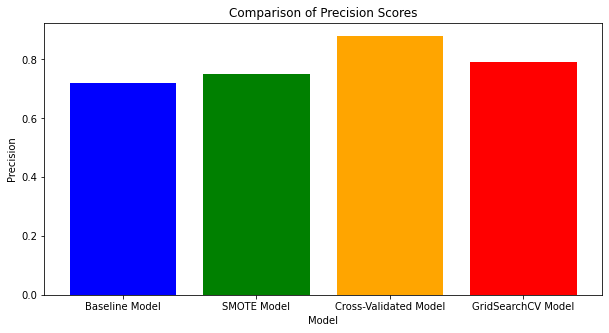

<Figure size 432x288 with 0 Axes>

In [31]:
# Precision scores for different models
precision_scores = {
    "Baseline Model": 0.72,  # Rounded off to two dp 
    "SMOTE Model": 0.75,
    "Cross-Validated Model": 0.88,
    "GridSearchCV Model": 0.79}

# Create a DataFrame
precision_df = pd.DataFrame(list(precision_scores.items()), columns=["Model", "Precision"])

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(precision_df["Model"], precision_df["Precision"], color=["blue", "green", "orange", "red"])
plt.xlabel("Model")
plt.ylabel("Precision")
plt.title("Comparison of Precision Scores")
plt.show()

# Save the figure
plt.savefig("images/Comparison of Precision Scores.png")

From the graph we can conclude that the cross-validated model had the best performance.

#### Random Forest
Let's fit a random forest classifier and see how it performs compared to the other models.

In [32]:
# Create and fit a Random Forest Classifier
RForest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
RForest.fit(X_train_scaled, y_train)

# Make predictions on the training set
RForest_train_preds = RForest.predict(X_train_scaled)

# Evaluate the performance of the Random Forest model
evaluate_train_precision(y_train, RForest_train_preds)

Train Precision: 0.9214482062536088


0.9214482062536088

The precision value for the random forest model is approximately 0.921.
The random forest model is better at correctly identifying positive cases (predicting the likelihood of obesity) without making as many false positive predictions compared to the logistic regression models.

#### Random Forest Iteration 1
We can examine how important each feature ended up being in our random forest model. We check the `feature_importances_` attribute of the trained model to see what it displays.

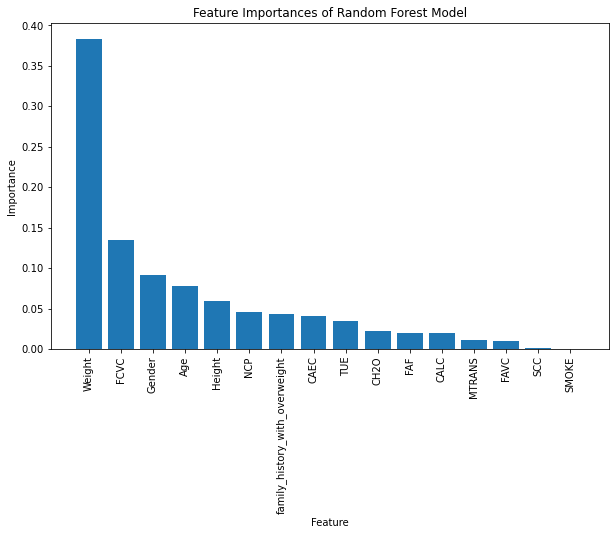

<Figure size 432x288 with 0 Axes>

In [33]:
# Get feature importances from the trained model
feature_importances = RForest.feature_importances_

# Get the names of the features
feature_names = X.columns  

# Sort indices in descending order based on feature importances
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances of Random Forest Model")
plt.show()

# Save the figure
plt.savefig("images/Feature Importances of Random Forest Model.png")

Weight has the highest importance, indicating that it strongly influences the model's predictions. `FCVC`, `Age`, `Height`, `Gender`, `family_history_with_overweight`, `NCP`, `CAEC` and `TUE` also contribute significantly, while other features have lower importance.

In an attempt to optimize performance of the model, we narrow our features based on the results. We can see that the features from `0.02` seem to be unimportant for our model therefore we set our threshold value to 0.02 and refit the model to check whether using less features give us better performance.

In [34]:
# Select a threshold for feature importance
threshold = 0.02 

# Identify features to keep based on the threshold
selected_features = feature_names[feature_importances > threshold]

# Subset your training data to keep only the selected features
X_train_selected = X_train[selected_features]

# Train your model on the subset of features using the training set
RForest.fit(X_train_selected, y_train)

# Make predictions on the training set
train_preds_selected = RForest.predict(X_train_selected)

# Evaluate model performance using the function
evaluate_train_precision(y_train, train_preds_selected)

Train Precision: 0.9113745701054824


0.9113745701054824

After this second iteration of the random forest model, we can see that removing the features that are not important to our model does not improve our model's performance. Using all the features gives us better metrics. This suggests that these features contribute collectively to the model's predictive performance.

### 5. Choose and Evaluate a Final Model. 
Which of our model had the best performance?

We instantiate our `final_model` with the best model and hyperparameters.
We found that the model that performed best by giving us the highest precision(0.92) was the Random Forest model that made use of all the features. We use this model to fit our final model and evaluate the metrics for this model on our train and test sets.

In [35]:
final_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
final_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

We now evaluate the accuracy, precision, recall and F1 score for our model.

In [36]:
# Make predictions on the training set
final_train_preds = final_model.predict(X_train_scaled)

# Make predictions on the test set
final_test_preds = final_model.predict(X_test_scaled)

In [37]:
# Calculate accuracy and precision for train and test sets
def evaluate_model_performance(train_true, train_pred, test_true, test_pred):
    """
    Evaluate the performance of a model on both training and testing sets.

    Parameters:
    - train_true (array-like): True labels of the training set.
    - train_pred (array-like): Predicted labels on the training set.
    - test_true (array-like): True labels of the testing set.
    - test_pred (array-like): Predicted labels on the testing set.

    Prints and returns:
    - Train Set Metrics:
        - Precision score, accuracy score, recall score, F1 score and classification report on the training set.
    - Test Set Metrics:
        - Precision, accuracy , recall , F1 score and classification report on the testing set.
    """
    
    # Train Set Precision
    train_precision = precision_score(train_true, train_pred, average="weighted")
    print(f"Train Precision: {train_precision}")
    
     # Test Set Precision
    test_precision = precision_score(test_true, test_pred, average="weighted")
    print(f"Test Precision: {test_precision}")
    
    print("------------")
    
    # Train Set Accuracy
    train_accuracy = accuracy_score(train_true, train_pred)
    print(f"Train Accuracy: {train_accuracy}")
    
    # Test Set Accuracy
    test_accuracy = accuracy_score(test_true, test_pred)
    print(f"Test Accuracy: {test_accuracy}")
    
    print("------------")

    # Train Set Recall
    train_recall = recall_score(train_true, train_pred, average="weighted")
    print(f"Train Recall: {train_recall}")
    
    # Test Set Recall
    test_recall = recall_score(test_true, test_pred, average="weighted")
    print(f"Test Recall: {test_recall}")
    
    print("------------")    

    # Train Set F1-Score
    train_f1 = f1_score(train_true, train_pred, average="weighted")
    print(f"Train F1 Score: {train_f1}")
    
    # Test Set F1-Score
    test_f1 = f1_score(test_true, test_pred, average="weighted")
    print(f"Test F1 Score: {test_f1}") 

# Evaluate our baseline model performance
evaluate_model_performance(y_train, final_train_preds, y_test, final_test_preds)    

Train Precision: 0.9214482062536088
Test Precision: 0.8435438255496746
------------
Train Accuracy: 0.9209860935524652
Test Accuracy: 0.8352272727272727
------------
Train Recall: 0.9209860935524652
Test Recall: 0.8352272727272727
------------
Train F1 Score: 0.9207188684243659
Test F1 Score: 0.8330478577779107


The metrics for the Random Forest model show a high level of consistency between the training and test sets, which is generally a good sign.

The precision values for both the training and test sets are high, indicating that the model is making accurate positive predictions. There is a slight drop from training to test, but it's not a significant difference. The precision(0.92) is also better compared to the logistic models.

Given the consistency in performance between the training and test sets, it doesn't appear that the model is overfitting. The model seems to generalize well to new, unseen data.

# Evaluation
Based on the metrics for our final model, it demonstrates strong performance in terms of precision, accuracy, recall, and F1 score on both the training and test sets. The precision on the training set is notably high at `0.921`, indicating that the model is effective in minimizing false positives, which is crucial in the context of predicting the risk of someone being obese. This is particularly important for healthcare providers as it ensures that when the model predicts a positive outcome (risk of obesity), it is highly reliable.

However, there is a slight drop in precision on the test set compared to the training set, which is not uncommon. The test precision of `0.844` still indicates a robust ability to correctly classify individuals at risk of obesity. The overall accuracy, recall, and F1 score are also impressive, demonstrating a well-balanced model that performs consistently across various metrics.

In healthcare, high precision is crucial to avoid false alarms, ensuring that when the model predicts a positive outcome, the healthcare providers can trust the result. The strong performance on the test set suggests that the model generalizes well to unseen data, making it a reliable tool for healthcare providers in assessing obesity risk. 

# Conclusion
The final model, a Random Forest Classifier, has demonstrated great performance in predicting the risk of obesity. With high precision, accuracy, recall, and F1 score on both the training and test sets, the model showcases its effectiveness in identifying individuals at risk. This precision is particularly crucial in healthcare, where minimizing false positives is essential to ensure reliable predictions.

# Recommendations
- **Intergrate model into workflow.** Based on the model's success, it is recommended to integrate it into the healthcare provider's workflow for assessing obesity risk. Healthcare professionals can use the model as an additional tool to identify individuals who may benefit from preventive interventions or closer monitoring.
- **Collaboration between data scientists and healthcare providers** is recommended to fine-tune the model based on real-world feedback and evolving healthcare practices. Considering the specific requirements and constraints of the healthcare setting, potential adjustments may be made based on the stakeholders' feedback.

# Next Steps
- **Continuous Monitoring and Improvement:** Regularly monitor the model's performance in a real-world healthcare setting. Collect feedback from healthcare providers to identify any challenges or areas for improvement.
- **Extended Stakeholder Involvement:** Involve a broader range of stakeholders, including patients, in the model development process to incorporate diverse perspectives and address ethical considerations.
- **Model Updates:** Periodically retrain the model with new data to ensure its relevance and effectiveness over time. Stay informed about advancements in obesity research to incorporate the latest findings into the model.